In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [3]:
# Constants of the Lorenz System
b = 8/3
s = 10
r = 28
d0 = 10e-8
# Functions dx,dy,dz of the Lorenz System
def dx(t,x,y,z):
    return s*(y-x)
def dy(t,x,y,z):
    return x*(r-z) -y
def dz(t,x,y,z):
    return x*y - b*z

In [4]:
def rk4(func,t,a,b,c,dt):
    """
    Peforms a single time step of the Runge-Kutta 4th Order Method.
    The below function finds the ki value for [dx,dy,dz] and return the value to move Yn+1
    func is an input of functions, for the Lorenz system this is [dx,dy,dz]
    
    Recall Rk4 Equations :
    k1 = h*f(xn,yn)
    k2 = h*f(xn+h/2,yn+k1/2)
    k3 = h*f(xn+h/2,yn+k2/2)
    k4 = h*f(xn,yn+k3)
    Where f is a function [dx,dy,dz]
    Yn+1 = Yn + 1/6*(k1+k2+k3+k4)
    """
    
    k1,k2,k3,k4 = [],[],[],[]
    for f in func:
        k1.append(dt*f(t,a,b,c))
    for f in func:
        k2.append(dt*f(t+dt/2,a+k1[0]/2,b+k1[1]/2,c+k1[2]/2))
    for f in func:
        k3.append( dt*f(t+dt/2,a+k2[0]/2,b+k2[1]/2,c+k2[2]/2))
    for f in func:
        k4.append( dt*f(t+dt/2,a+k3[0],b+k3[1],c+k3[1]))
    k1,k2,k3,k4 = np.array(k1),np.array(k2),np.array(k3),np.array(k4)
    return (1/6)*(k1+k2+k3+k4)

In [51]:
def lorenz(x0, y0, z0, start_time, time_step):
    """
    Returns an array of points, which the lorenz system passes by iteratively perfoming each rk4 timestep
    """
    x,y,z = [x0],[y0],[z0] # Start Points
    count = 0
    t = start_time or 0 # Start Time
    dt = time_step or 0.01 # Time Step
    l = np.zeros(int(150/dt))
    sumL = np.zeros(int(150/dt))
    while t < 150:
        t+= dt
        tempx,tempy,tempz = x[count],y[count],z[count] # Temporary Start Points
        func = np.array([dx,dy,dz])
        runge_kutta_4 = rk4(func,t,tempx,tempy,tempz,dt) # Rk4 Function
        tempx += runge_kutta_4[0]
        tempy += runge_kutta_4[1]
        tempz += runge_kutta_4[2]
        x.append(tempx)
        y.append(tempy)
        z.append(tempz)

        x1,y1,z1 = [x[count]+d0], [y[count]+d0], [z[count]+d0]
        tempx1,tempy1,tempz1 = x1[0], y1[0], z1[0]
        runge_kutta_4_1 = rk4(func,t,tempx1,tempy1,tempz1,dt)
        tempx1 += runge_kutta_4_1[0]
        tempy1 += runge_kutta_4_1[1]
        tempz1 += runge_kutta_4_1[2]
        x1.append(tempx1)
        y1.append(tempy1)
        z1.append(tempz1)
        
        l[count] = mt.sqrt( (x1[1] - x[count+1])**2 + (y1[1] - y[count+1])**2 + (z1[1] - z[count+1])**2 )
        sumL[count] = mt.log(l[count] / d0)
        
#         print(sumL[count])
        
        count +=1
    lyapunov = sumL.sum() / (150/dt)
    fig = plt.figure(figsize=(12,8))
    plt.plot(range(count), sumL)
    return x, y, z, lyapunov

Lyapunov Exp: 0.5456138477842406


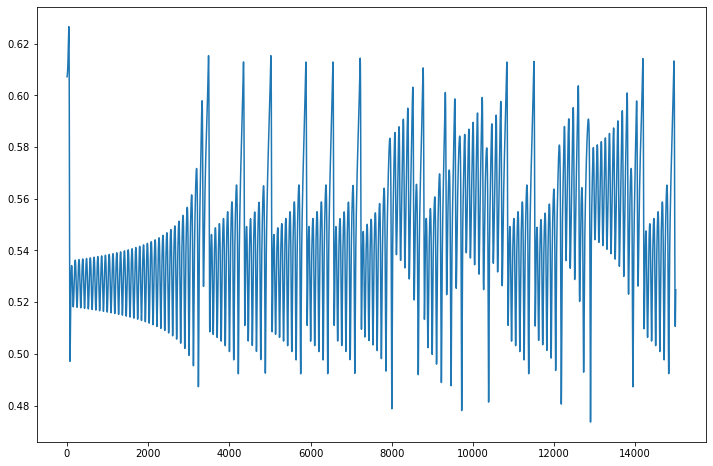

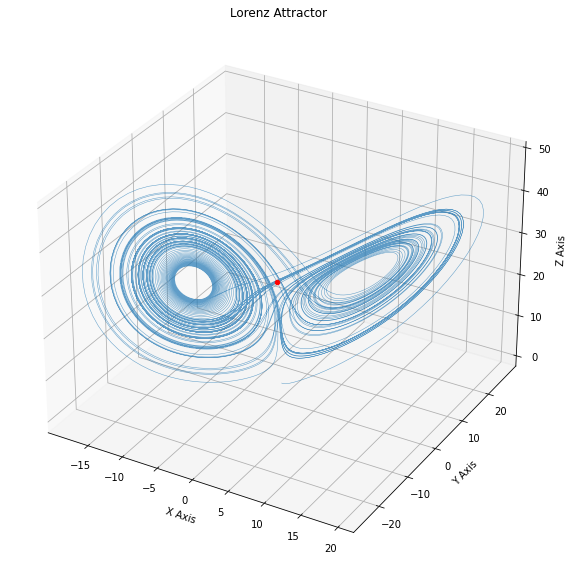

In [52]:
x,y,z,l = lorenz(0, 1, 1.05, 0, 0.01)
fig = plt.figure(figsize=(12,10))
# This is how we set the 3D plot
ax = plt.axes(projection='3d')
# Plotting the values
ax.plot(x, y, z, lw=0.5,alpha=0.7)

print("Lyapunov Exp:", l)
 
# Plotting the final values
ax.scatter(x[-1],y[-1],z[-1],color=(1,0,0))
#Very slightly different starting values
# x_1,y_1,z_1 = lorenz(0,0.9,1.04,0,0.01)
#Plotting slightly different starting values
# ax.scatter(x_1[-1],y_1[-1],z_1[-1],color=(0,0,0))
#Setting Axis Titles
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()

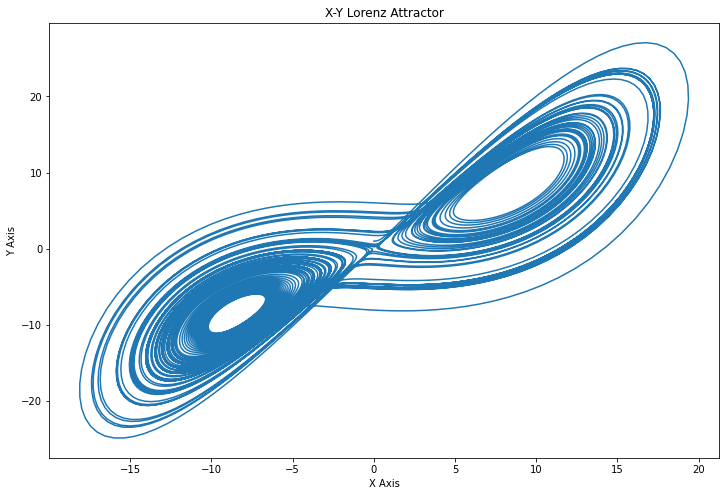

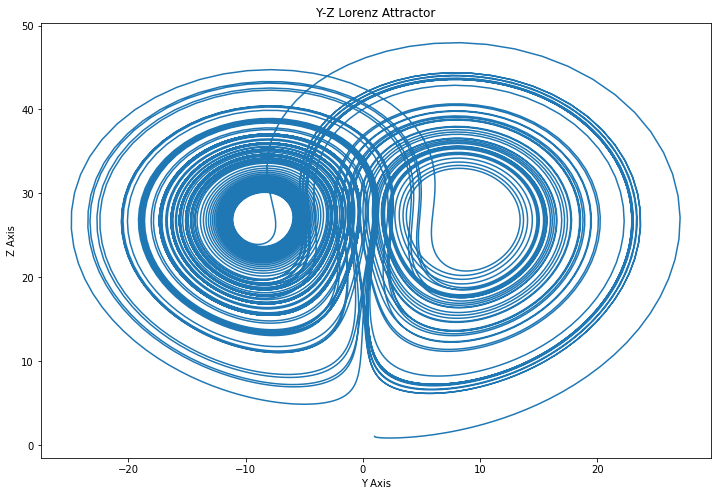

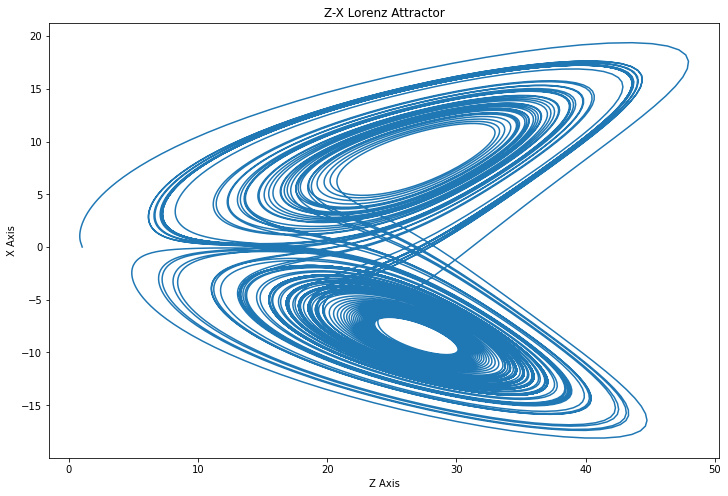

In [16]:
fig = plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("X-Y Lorenz Attractor")
fig = plt.figure(figsize=(12,8))
plt.plot(y, z)
plt.xlabel("Y Axis")
plt.ylabel("Z Axis")
plt.title("Y-Z Lorenz Attractor")
fig = plt.figure(figsize=(12,8))
plt.plot(z, x)
plt.xlabel("Z Axis")
plt.ylabel("X Axis")
plt.title("Z-X Lorenz Attractor")
plt.show()